In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
import re
from sklearn.metrics import mean_squared_error, r2_score

In [283]:
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

In [284]:
datos = pd.read_csv('D:/bsaan/OneDrive - Universidad Nacional Abierta y a Distancia/universidad/Septimo semestre/Analisis de datos/actividad 3/solucion/regresion lineal/Car details v3.csv')

In [285]:
# Visualizar las primeras filas del dataset
print(datos.head())

                         nombre   año  precio_de_venta  km_recorridos  \
0        Maruti Swift Dzire VDI  2014           450000         145500   
1  Skoda Rapid 1.5 TDI Ambition  2014           370000         120000   
2      Honda City 2017-2020 EXi  2006           158000         140000   
3     Hyundai i20 Sportz Diesel  2010           225000         127000   
4        Maruti Swift VXI BSIII  2007           130000         120000   

  combustible tipo_vendedor transmisión   propietario kilometraje    motor  \
0      Diesel    Individual      Manual   First Owner   23.4 kmpl  1248 CC   
1      Diesel    Individual      Manual  Second Owner  21.14 kmpl  1498 CC   
2      Petrol    Individual      Manual   Third Owner   17.7 kmpl  1497 CC   
3      Diesel    Individual      Manual   First Owner   23.0 kmpl  1396 CC   
4      Petrol    Individual      Manual   First Owner   16.1 kmpl  1298 CC   

  potencia_máxima                       par  asientos  
0          74 bhp            190Nm@ 

In [286]:
# Obtener información sobre el dataset
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre           8128 non-null   object 
 1   año              8128 non-null   int64  
 2   precio_de_venta  8128 non-null   int64  
 3   km_recorridos    8128 non-null   int64  
 4   combustible      8128 non-null   object 
 5   tipo_vendedor    8128 non-null   object 
 6   transmisión      8128 non-null   object 
 7   propietario      8128 non-null   object 
 8   kilometraje      7907 non-null   object 
 9   motor            7907 non-null   object 
 10  potencia_máxima  7913 non-null   object 
 11  par              7906 non-null   object 
 12  asientos         7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [287]:
# Resumen estadístico de las variables numéricas
print(datos.describe())

               año  precio_de_venta  km_recorridos     asientos
count  8128.000000     8.128000e+03   8.128000e+03  7907.000000
mean   2013.804011     6.382718e+05   6.981951e+04     5.416719
std       4.044249     8.062534e+05   5.655055e+04     0.959588
min    1983.000000     2.999900e+04   1.000000e+00     2.000000
25%    2011.000000     2.549990e+05   3.500000e+04     5.000000
50%    2015.000000     4.500000e+05   6.000000e+04     5.000000
75%    2017.000000     6.750000e+05   9.800000e+04     5.000000
max    2020.000000     1.000000e+07   2.360457e+06    14.000000


In [289]:
# Paso 2: Preprocesamiento de datos
# Limpiar y transformar la columna 'kilometraje'
datos['kilometraje'] = datos['kilometraje'].astype(str)
datos['kilometraje'] = datos['kilometraje'].str.extract(r'(\d+)', expand=False)

# Limpiar y transformar la columna 'motor'
datos['motor'] = datos['motor'].astype(str)
datos['motor'] = datos['motor'].str.extract(r'(\d+)', expand=False).astype(str)

# Limpiar y transformar la columna 'potencia_máxima'
datos['potencia_máxima'] = datos['potencia_máxima'].astype(str)
datos['potencia_máxima'] = datos['potencia_máxima'].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)

# Tratar valores faltantes
datos = datos.dropna()  # Eliminar filas con valores faltantesos

In [290]:
# Segun la parte anterior no hay valores en cero pero si los hubiese se reemplazarian los valores(enteras o decimales) en cero por la media
#numeric_columns = datos.select_dtypes(include=['int', 'float']).columns
#for column in numeric_columns:
#    datos[column] = datos[column].replace(0, datos[column].mean())


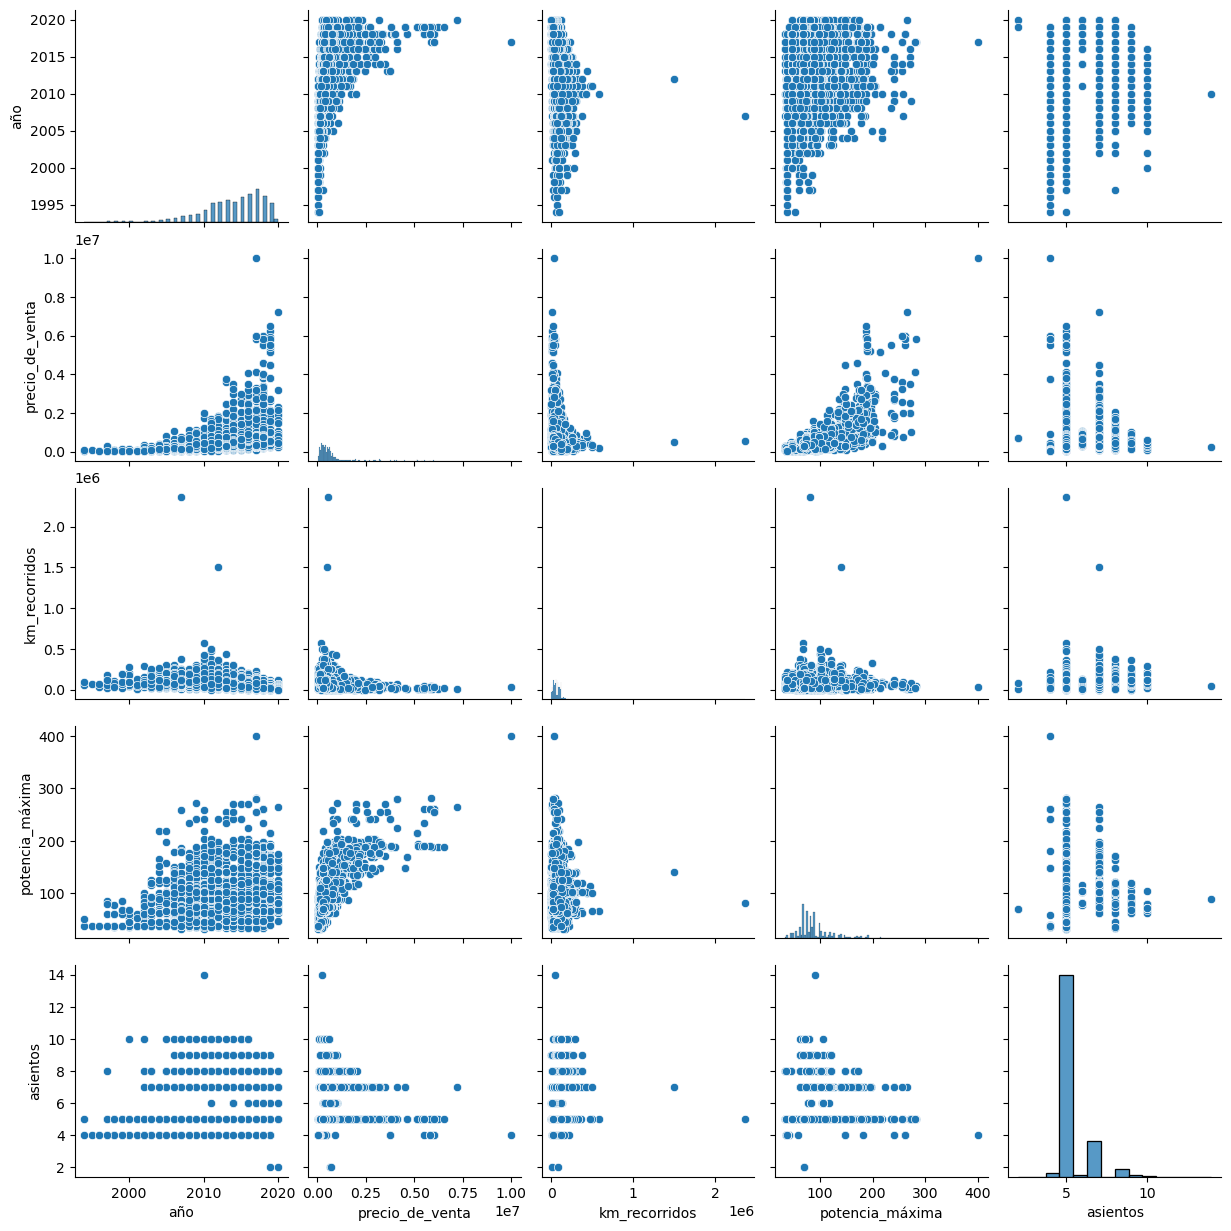

In [291]:
# Visualizar relaciones entre variables
sns.pairplot(datos)
plt.show()

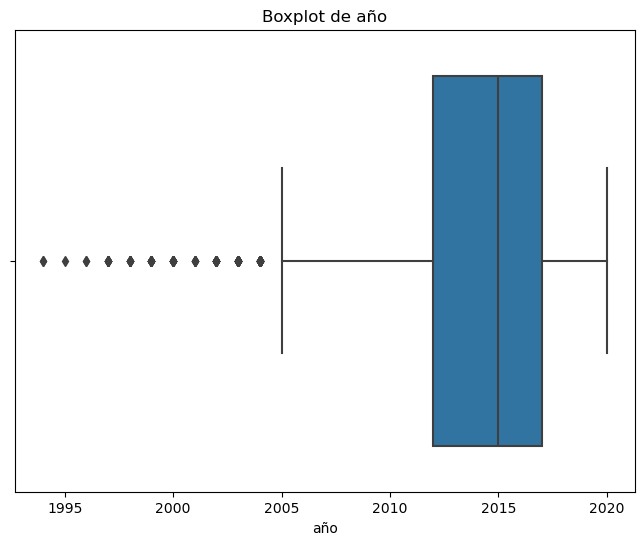

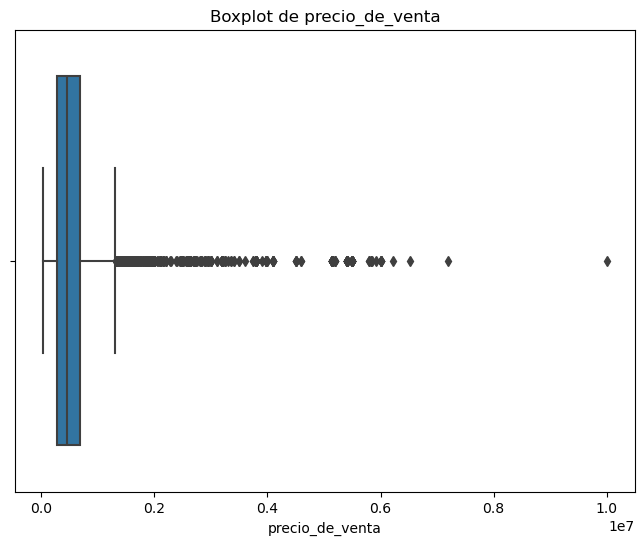

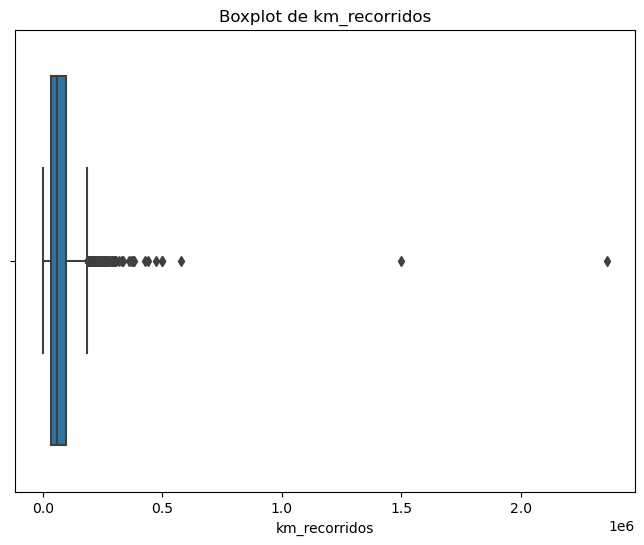

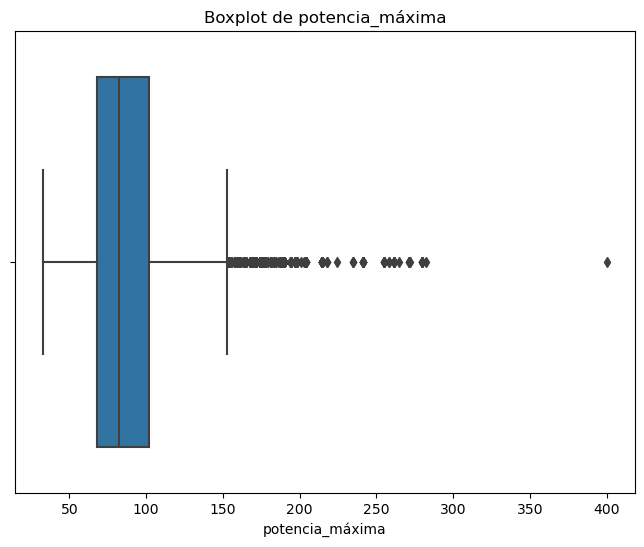

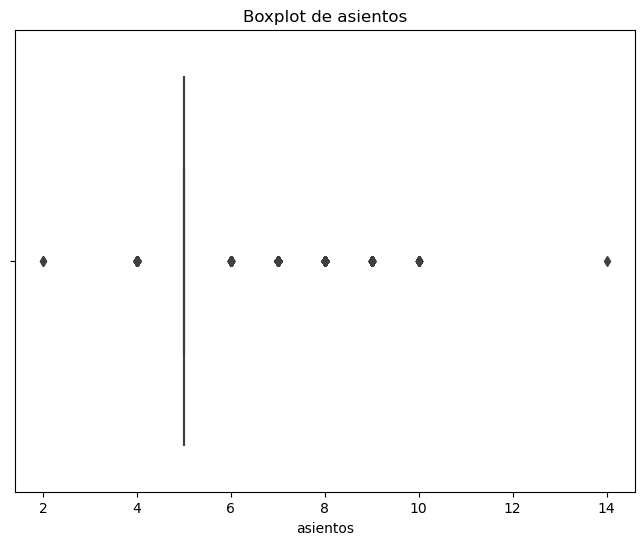

In [292]:
# Visualización de diagramas de caja para cada variable numérica
for column in datos.columns:
    if datos[column].dtype != 'object':  # Solo variables numéricas
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=datos[column])
        plt.title("Boxplot de " + column)
        plt.show()

Text(0.5, 1.0, 'Identificación datos atipicos')

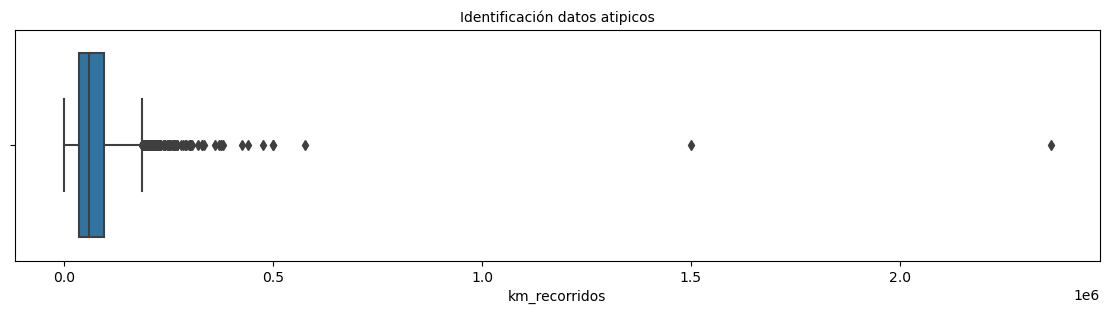

In [293]:
#Identificar valores atípicos
plt.figure(figsize=(14,3))
sns.boxplot(x=datos['km_recorridos'])
plt.title('Identificación datos atipicos', fontsize=10)

In [294]:
min = 0
max = 500000
total_atipicos = ((datos['km_recorridos']<min) | (datos['km_recorridos']>max)).sum()
print ('Total atipicos {}'.format(total_atipicos))

Total atipicos 3


In [295]:
#Eliminando datos atipicos
datos = datos[(datos['km_recorridos']<max) & (datos['km_recorridos']>min)]

In [296]:
# Conversión de variables categóricas a numéricas (combustible y transmisión)
datos = pd.get_dummies(datos, columns=['combustible', 'transmisión'], drop_first=True)
print(datos.columns)


Index(['nombre', 'año', 'precio_de_venta', 'km_recorridos', 'tipo_vendedor',
       'propietario', 'kilometraje', 'motor', 'potencia_máxima', 'par',
       'asientos', 'combustible_Diesel', 'combustible_LPG',
       'combustible_Petrol', 'transmisión_Manual'],
      dtype='object')


In [297]:
# Paso 3: Selección de características
features = ['asientos', 'motor', 'kilometraje', 'km_recorridos', 'año', 'combustible_Diesel', 'combustible_LPG',
       'combustible_Petrol', 'transmisión_Manual']
X = datos[features]
y = datos['precio_de_venta']

In [298]:
# Paso 4: División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [299]:
# Paso 5: Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [303]:
# Paso 6: Evaluación del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error medio cuadrado:", mse)
print("R-cuadrado:", r2)

Error medio cuadrado: 285857876511.2955
R-cuadrado: 0.5587006852566241


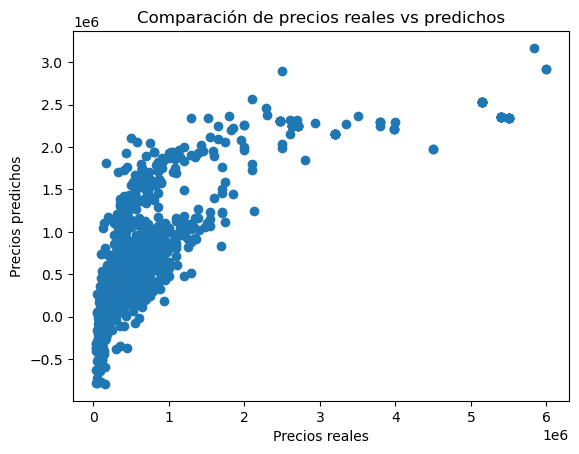

In [304]:
# Paso 7: Visualización de resultados
plt.scatter(y_test, y_pred)
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.title("Comparación de precios reales vs predichos")
plt.show()

In [305]:
# Paso 8: Interpretación y análisis de resultados
# Analizar coeficientes de regresión para entender la importancia de cada característica
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                      Coefficient
asientos           -173281.364150
motor                  756.050731
kilometraje              7.447858
km_recorridos           -2.669253
año                  49572.290529
combustible_Diesel  157567.660599
combustible_LPG     207964.864821
combustible_Petrol    4337.085881
transmisión_Manual -853825.703171
